#Importing Libraries

In [ ]:
import numpy as np                                                  # Mathematical Operation
import pandas as pd                                                 # Data Manipulation
import matplotlib.pyplot as plt                                     # Data Visualisation
import seaborn as sns                                               # Data Visualisation
import re                                                           # Data Cleaning
from sklearn.linear_model import LinearRegression                   # ML Algorithm
from sklearn.linear_model import LogisticRegression                 # ML Algorithm
from sklearn.metrics import r2_score                                # Accuracy Metric
from sklearn.metrics import accuracy_score                          # Accuracy Metric
from sklearn.metrics import confusion_matrix                        # Accuracy Metric
from sklearn.metrics import classification_report                   # 
from sklearn.model_selection import train_test_split                # Splitting the dataset into training & testing dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder       # Converting the categorical data into numerical data
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle                                                       # Pickled file

#Problem Statement


Choose an appropriate model for the project to predict the customers who are eligible for the loan and
also find out what are the missing criteria why other customers are not eligible for the loan.

#Importing the Dataset

In [ ]:

data_train = pd.read_csv("/content/drive/MyDrive/DevTown/Training Data.csv")
backup_train = pd.read_csv("/content/drive/MyDrive/DevTown/Training Data.csv")

data_test = pd.read_csv("/content/drive/MyDrive/DevTown/Testing Data.csv")
backup_test = pd.read_csv("/content/drive/MyDrive/DevTown/Testing Data.csv")


#EDA - Exploratory Data Analysis


In [ ]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Check the no. null values in each column
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Gender'>

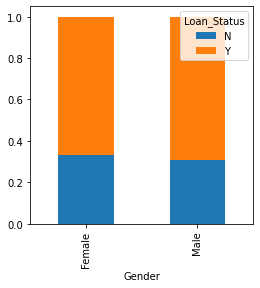

In [ ]:
Gender = pd.crosstab(data_train['Gender'] , data_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Married'>

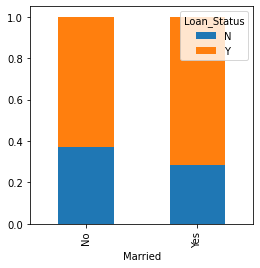

In [ ]:
Married = pd.crosstab(data_train['Married'] , data_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Dependents'>

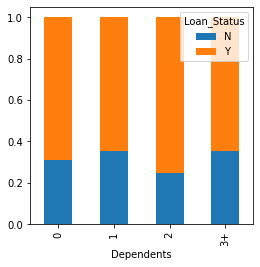

In [ ]:
Dependents = pd.crosstab(data_train['Dependents'] , data_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Education'>

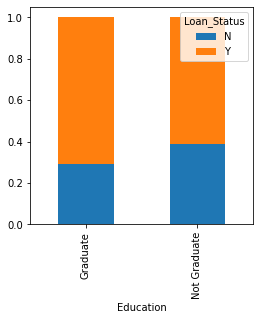

In [ ]:
Education = pd.crosstab(data_train['Education'] , data_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Self_Employed'>

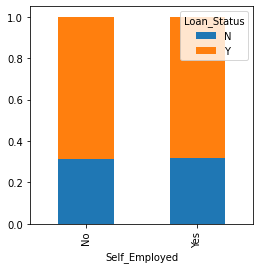

In [ ]:
Self_Employed = pd.crosstab(data_train['Self_Employed'],data_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Loan_Amount_Term'>

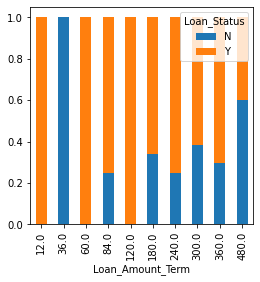

In [ ]:
Loan_Amount_Term = pd.crosstab(data_train['Loan_Amount_Term'] , data_train['Loan_Status'])
Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Credit_History'>

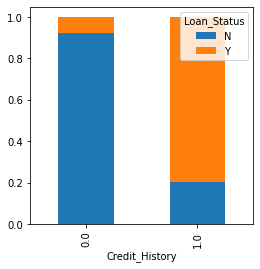

In [ ]:
Credit_History = pd.crosstab(data_train['Credit_History'] , data_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Property_Area'>

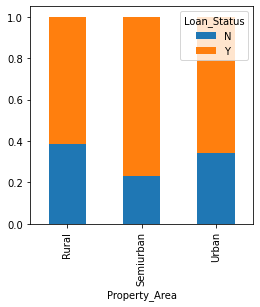

In [ ]:
Property_Area = pd.crosstab(data_train['Property_Area'] , data_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Gender, Married, Dependents, Education, Self_Employed & Property_Area has an equal impact on Loan Approval. \
Applicants with Credit Score = 1 have a higher chance of Loan Approval \
Applicants with property in Rural or Urban have a higher chance of Loan Approval \
Applicants who take the loan fofr 1, 5 or 10 years have the highest chance of Loan Approval

#Data Cleaning.

In [ ]:
#Loan_ID does not have any contribution to loan approval
data_train = data_train.drop('Loan_ID', axis=1)
data_test = data_test.drop('Loan_ID', axis=1)

In [ ]:
#filling the null value of Gender with the most frequent occurance
data_train.Gender.fillna(re.sub(".* |\n.*",'',str(data_train.Gender.mode())),inplace=True)
data_test.Gender.fillna(re.sub(".* |\n.*",'',str(data_test.Gender.mode())),inplace=True)

In [ ]:
#filling the null value of Married with the most frequent occurance
data_train.Married.fillna(re.sub(".* |\n.*",'',str(data_train.Married.mode())),inplace=True)
data_test.Married.fillna(re.sub(".* |\n.*",'',str(data_test.Married.mode())),inplace=True)

In [ ]:
#filling the null value of Dependents with the most frequent occurance
data_train.Dependents.fillna(int(data_train.Dependents.mode()),inplace=True)
data_test.Dependents.fillna(int(data_test.Dependents.mode()),inplace=True)

In [ ]:
#filling the null value of Self_Employed with the most frequent occurance
data_train.Self_Employed.fillna(re.sub(".* |\n.*",'',str(data_train.Self_Employed.mode())),inplace=True)
data_test.Self_Employed.fillna(re.sub(".* |\n.*",'',str(data_test.Self_Employed.mode())),inplace=True)

In [ ]:
#filling the null value of LoanAmount with the median
data_train.LoanAmount.fillna(data_train.LoanAmount.median(),inplace=True)
data_test.LoanAmount.fillna(data_test.LoanAmount.median(),inplace=True)

In [ ]:
#multiplying the LoanAmount by 1000 to get the absolute value
data_train.LoanAmount = data_train.LoanAmount.multiply(1000)
data_test.LoanAmount = data_test.LoanAmount.multiply(1000)

In [ ]:
#filling the null value of Loan_Amount_Term with the most frequent occurance
data_train.Loan_Amount_Term.fillna(float(data_train.Loan_Amount_Term.mode()),inplace=True)
data_test.Loan_Amount_Term.fillna(float(data_test.Loan_Amount_Term.mode()),inplace=True)

In [ ]:
#filling the null value of Credit_History with the most frequent occurance
data_train.Credit_History.fillna(float(data_train.Credit_History.mode()),inplace=True)
data_test.Credit_History.fillna(float(data_test.Credit_History.mode()),inplace=True)

In [ ]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145752.442997,342.410423,0.855049
std,6109.041673,2926.248369,84107.233380,64.428629,0.352339
min,150.000000,0.000000,9000.000000,12.000000,0.000000
25%,2877.500000,0.000000,100250.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128000.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164750.000000,360.000000,1.000000
max,81000.000000,41667.000000,700000.000000,480.000000,1.000000


The standard Deviation of Applicant Income & Loan Amount is too high, thus taking the logarithmic value of the two will reduce the standard deviation.

In [ ]:
log_train = np.log(data_train.LoanAmount)
log_test = np.log(data_test.LoanAmount)
data_train['LoanAmount_log'] = log_train
data_test['LoanAmount_log'] = log_test
#Applicant Income of data has 0 as value whose log cannot be determined

In [ ]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128000.0,360.0,1.0,Urban,Y,11.759786
1,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N,11.759786
2,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y,11.097410
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y,11.695247
4,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y,11.856515


In [ ]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110000.0,360.0,1.0,Urban,11.608236
1,Male,Yes,1,Graduate,No,3076,1500,126000.0,360.0,1.0,Urban,11.744037
2,Male,Yes,2,Graduate,No,5000,1800,208000.0,360.0,1.0,Urban,12.245293
3,Male,Yes,2,Graduate,No,2340,2546,100000.0,360.0,1.0,Urban,11.512925
4,Male,No,0,Not Graduate,No,3276,0,78000.0,360.0,1.0,Urban,11.264464


In [ ]:
#cheching if any null value exists
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [ ]:
#cheching if any duplicate entries exist
data_train.duplicated().sum()

0

In [ ]:
# Transforming values
enc = LabelEncoder()

In [ ]:
# Gender        : Male -> 1           Female -> 0
# Married       : Yes -> 1            No -> 0 
# Self_Employed : Yes -> 1            No -> 0
# Education     : Not Graduated -> 1  Graduated -> 0
# Property_Area : Urban -> 2          Semiurban -> 1        Rural -> 0
# Loan_Status   : Y -> 1              N -> 0 

data_train.Gender = enc.fit_transform(data_train.Gender)
data_train.Married = enc.fit_transform(data_train.Married)
data_train.Education = enc.fit_transform(data_train.Education)
data_train.Self_Employed = enc.fit_transform(data_train.Self_Employed)
data_train.Property_Area = enc.fit_transform(data_train.Property_Area)
data_train.Loan_Status = enc.fit_transform(data_train.Loan_Status)
data_train.Dependents.replace('3+',3,inplace=True)
data_train.Dependents = data_train.Dependents.astype(int)

data_test.Gender = enc.fit_transform(data_test.Gender)
data_test.Married = enc.fit_transform(data_test.Married)
data_test.Education = enc.fit_transform(data_test.Education)
data_test.Self_Employed = enc.fit_transform(data_test.Self_Employed)
data_test.Property_Area = enc.fit_transform(data_test.Property_Area)
data_test.Dependents.replace('3+',3,inplace=True) 
data_test.Dependents = data_test.Dependents.astype(int)

# Obseravtions:

1. Data Strength: 614
2. No. of random variables: 13
3. Columns - contained Null values - Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History
4. Columns - were having numerical value - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
5. Columns - were having categorical value - Gender, Married,  Self_Employed, Credit_Histort, Loan_Status
6. Columns - having ordinal value - Dependents, Education, Property_Area

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
 11  LoanAmount_log     367 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 34.5 KB


#Splitting the Dataset

In [ ]:
x = data_train.drop(['Loan_Status','LoanAmount'], axis=1)
y = data_train['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Model Testing

In [ ]:
lr = LinearRegression()
lrc = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [ ]:
lr.fit(x_train, y_train)
lrc.fit(x_train, y_train)
svc.fit(x_train, y_train)
dtc.fit(x_train, y_train)
rfc.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [ ]:
lr_y_pred = lr.predict(x_test)
lrc_y_pred = lrc.predict(x_test)
svc_y_pred = svc.predict(x_test)
dtc_y_pred = dtc.predict(x_test)
rfc_y_pred = lrc.predict(x_test)

In [ ]:
final = pd.DataFrame({"Actual": y_test,
                      "LR": lr_y_pred,
                      "LRC": lrc_y_pred,
                      "SVC": svc_y_pred,
                      "DTC": dtc_y_pred,
                      "RFC": rfc_y_pred})

In [ ]:
print(f'Accuracy by Linear Regression = {r2_score(y_test, lr_y_pred)*100}%')
print(f'Accuracy by Logistic Regression = {accuracy_score(y_test, lrc_y_pred)*100}%')
print(f'Accuracy by SVC = {accuracy_score(y_test, svc_y_pred)*100}%')
print(f'Accuracy by Decision Tree = {accuracy_score(y_test, dtc_y_pred)*100}%')
print(f'Accuracy by Random Forest = {accuracy_score(y_test, lrc_y_pred)*100}%')

Accuracy by Linear Regression = 27.176995206851075%
Accuracy by Logistic Regression = 78.86178861788618%
Accuracy by SVC = 65.04065040650406%
Accuracy by Decision Tree = 73.17073170731707%
Accuracy by Random Forest = 78.86178861788618%


The accuracy of Logictic Regression is highest as compared to other Models. So we will continue with Logistic Regression Model

In [ ]:
final.drop(['LR','SVC','DTC','RFC'], axis=1, inplace=True)
final.rename(columns={'LRC':'Predicted'},inplace=True)

#Loan Approval Prediction

We will now perform the Prediction on Testing data by Logictic Regression Model

In [ ]:
X_train = data_train.drop(['Loan_Status','LoanAmount'], axis=1)
Y_train = data_train['Loan_Status']
X_test = data_test.drop(['LoanAmount'], axis=1)

In [ ]:
lrc = LogisticRegression()

In [ ]:
lrc.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_test = pd.DataFrame(lrc.predict(X_test))

In [ ]:
final_test = backup_test

In [ ]:
data_test['Predicted_Loan_Approval'] = Y_test
final_test['Predicted_Loan_Approval'] = Y_test
final_test.Predicted_Loan_Approval.replace({1:'Y' , 0:'N'}, inplace = True)

In [ ]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Predicted_Loan_Approval
0,1,1,0,0,0,5720,0,110000.0,360.0,1.0,2,11.608236,1
1,1,1,1,0,0,3076,1500,126000.0,360.0,1.0,2,11.744037,1
2,1,1,2,0,0,5000,1800,208000.0,360.0,1.0,2,12.245293,1
3,1,1,2,0,0,2340,2546,100000.0,360.0,1.0,2,11.512925,1
4,1,0,0,1,0,3276,0,78000.0,360.0,1.0,2,11.264464,1


In [ ]:
final_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Approval
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [ ]:
final_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#Exporting Pickle File

In [ ]:
final_test.to_pickle("Loan_Prediction.pkl")

#Data Analysis

1. What's the ratio of Male to Female?

In [ ]:
Male = data_test[data_test.Gender == 1]
Female = data_test[data_test.Gender == 0]
print(f'Male : Female = {Male.Gender.count()} : {Female.Gender.count()}')

Male : Female = 297 : 70


2. How many Males are married and non-married?


In [ ]:
Male_Married = Male[Male.Married == 1]
Male_Unmarried = Male[Male.Married == 0]
print(f'No of Married Males: {Male_Married.Married.count()} \nNo. of Unmarried Males: {Male_Unmarried.Married.count()}')

No of Married Males: 207 
No. of Unmarried Males: 90


3. How many Females are married and non-married?

In [ ]:
Female_Married = Female[Female.Married == 1]
Female_Unmarried = Female[Female.Married == 0]
print(f'No of Married Females: {Female_Married.Married.count()} \nNo. of Unmarried Females: {Female_Unmarried.Married.count()}')

No of Married Females: 26 
No. of Unmarried Females: 44


4. How many Males and Females are graduated and non-graduated with respect to their Marital status?


In [ ]:
print('Male')

M_M_G = Male_Married[Male_Married.Education == 1]
print(f'Married & Graduated: {M_M_G.Education.count()}')

M_M_NG = Male_Married[Male_Married.Education == 0]
print(f'Married & Not Graduated: {M_M_NG.Education.count()}')

M_UM_G = Male_Unmarried[Male_Unmarried.Education == 1]
print(f'Unmarried & Graduated: {M_UM_G.Education.count()}')

M_UM_NG = Male_Unmarried[Male_Unmarried.Education == 0]
print(f'Unmarried & Not Graduated: {M_UM_NG.Education.count()}')

print('\nFemale')

F_M_G = Female_Married[Female_Married.Education == 1]
print(f'Married & Graduated: {F_M_G.Education.count()}')

F_M_NG = Female_Married[Female_Married.Education == 0]
print(f'Married & Not Graduated: {F_M_NG.Education.count()}')

F_UM_G = Female_Unmarried[Female_Unmarried.Education == 1]
print(f'Unmarried & Graduated: {F_UM_G.Education.count()}')

F_UM_NG = Female_Unmarried[Female_Unmarried.Education == 0]
print(f'Unmarried & Not Graduated: {F_UM_NG.Education.count()}')

Male
Married & Graduated: 52
Married & Not Graduated: 155
Unmarried & Graduated: 18
Unmarried & Not Graduated: 72

Female
Married & Graduated: 5
Married & Not Graduated: 21
Unmarried & Graduated: 9
Unmarried & Not Graduated: 35


5. Which type of encoding will be required to perform on the "Education" column?
>Ans->  Label Encoding is performed on Education Column because there are only two possible answers, "Graduated" & "Not Graduated" which can be replaced by 1 & 0

6.  Is it a male or a female whose loan amount is the highest?


In [ ]:
Gen=data_test.Gender[data_test.LoanAmount == data_test.LoanAmount.max()].reset_index()
Gen.Gender[0]
# 1 -> Male
# 0 -> Female

1

7. The specification and information about the applicant who has the highest income?

In [ ]:
data_test[data_test.LoanAmount == data_test.LoanAmount.max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Predicted_Loan_Approval
143,1,1,0,0,1,32000,0,550000.0,360.0,1.0,1,13.217674,1


8. What all features are you going to consider for the model training and why?

>Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome & LoanAmount 

>These columns    



9. Which model are you going to choose and define the reason for going with the same model?

> I choose Logistic REgression Model. it showed the highest accuracy while testing and logistic regresstion model gives a binary result (1/0 Yes/No) and out prediction model required a result of such components.

10. Have you performed the Hyper Parameter Tuning?
>No

11. Compare the Actual results with the Predicted results

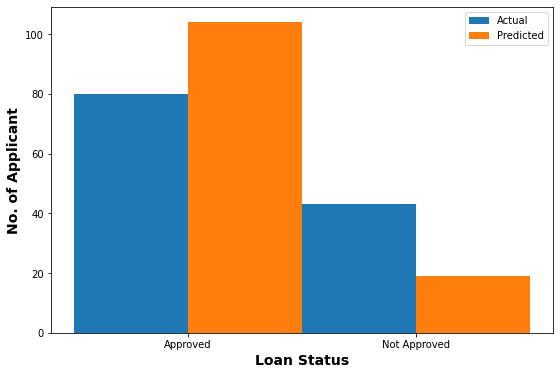

In [ ]:
fig = plt.subplots(figsize = (9,6))

ac = [final.Actual[final.Actual==1].count() , final.Actual[final.Actual==0].count()]
prd = [final.Predicted[final.Predicted==1].count() , final.Predicted[final.Predicted==0].count()]

br1 = np.arange(len(ac))
br2 = [x + 0.5 for x in br1]
br3 = [x + 0.5 for x in br2]

plt.bar(br1 , ac , width=0.5 , label = 'Actual')
plt.bar(br2 , prd , width=0.5 , label = 'Predicted')

plt.xlabel('Loan Status', fontweight='bold', fontsize=14)
plt.ylabel('No. of Applicant', fontweight='bold', fontsize=14)
plt.xticks([r + 0.25 for r in range(len(ac))],['Approved','Not Approved'])

plt.legend()
plt.show()

12. What's the accuracy of your model?

In [ ]:
accuracy_score(y_test,lrc_y_pred)

0.7886178861788617

13. In order to improve the accuracy, what more approaches can be done?
 More clean data can be used

*   More clean data can be used
*   Data with for information reagrding the Loan can be used to train the Model




14. What can you conclude with respect to the data? \
Ans -> \
Gender, Married, Dependents, Education, Self_Employed & Property_Area has an equal impact on Loan Approval. \
Applicants with Credit Score = 1 have a higher chance of Loan Approval \
Applicants with property in Rural or Urban have a higher chance of Loan Approval \
Applicants who take the loan fofr 1, 5 or 10 years have the highest chance of Loan Approval